Plots adversary win rate at varying board sizes.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import utils

plt.style.use(
    ["tableau-colorblind10", utils.get_style("default"), utils.get_style("2-col")]
)

In [3]:
df = utils.parse_sgfs(
    ["/nas/ucb/k8/go-attack/match/ttseng-hard-s545m-bsz-sweep-20221206"]
)

In [4]:
print(df.groupby("board_size").mean(numeric_only=True).adv_win)
print(
    df.query("adv_color.str.contains('b')")
    .groupby("board_size")
    .mean(numeric_only=True)
    .adv_win
)
print(
    df.query("adv_color.str.contains('w')")
    .groupby("board_size")
    .mean(numeric_only=True)
    .adv_win
)

board_size
7     0.495000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.430000
13    0.520000
14    0.665000
15    0.805000
16    0.825000
17    0.875000
18    0.895000
19    0.946667
Name: adv_win, dtype: float64
board_size
7     0.99
8     0.00
9     0.00
10    0.00
11    0.00
12    0.42
13    0.45
14    0.63
15    0.80
16    0.80
17    0.89
18    0.86
19    0.98
Name: adv_win, dtype: float64
board_size
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.440000
13    0.590000
14    0.700000
15    0.810000
16    0.850000
17    0.860000
18    0.930000
19    0.913333
Name: adv_win, dtype: float64


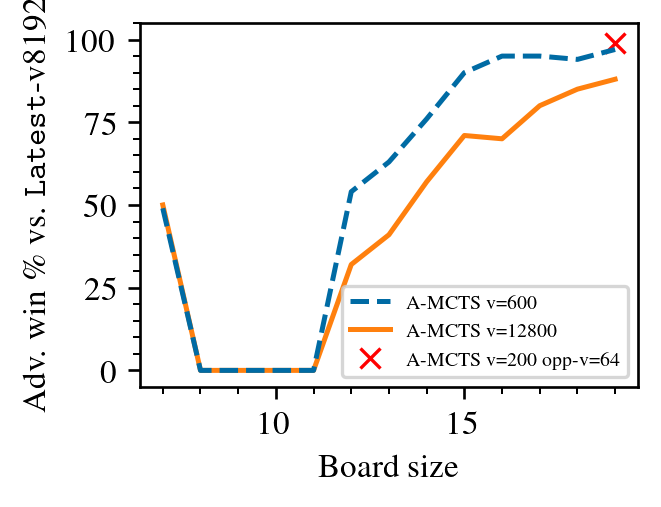

In [9]:
fig, ax = plt.subplots(1, 1)


def get_win_rate_by_board_size(df: pd.DataFrame, df_query: str) -> pd.Series:
    win_proportion = (
        df.query(df_query).groupby("board_size").adv_win.mean(numeric_only=True)
    )
    return 100 * win_proportion


get_win_rate_by_board_size(df, "adv_name.str.contains('v600')").plot(
    label="A-MCTS v=600", zorder=10, linestyle="--"
)
get_win_rate_by_board_size(df, "adv_name.str.contains('v12800')").plot(
    label="A-MCTS v=12800"
)

bounded_recursive_win_rate = 100 * df.query(
    "adv_name.str.contains('opp')"
).adv_win.mean(numeric_only=True)
plt.plot(19, bounded_recursive_win_rate, "rx", label="A-MCTS v=200 opp-v=64")

plt.ylim(-5, 105)
ax.minorticks_on()
plt.ylabel("Adv. win \\% vs. $\\texttt{Latest}$-v8192")
plt.xlabel("Board size")
ax.legend(prop={"size": 6})